In [121]:
%matplotlib inline

import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import numpy as np
from scipy.stats import linregress


In [2]:
file= Path("data/Home_inventory.monthly.csv")
inventory_df=pd.read_csv(file)



In [3]:
inventory_df.head(13)

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,102001,0,United States,country,NaN,1421529.0,1500193.0,1592414.0,1660614.0,1709142.0,...,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884129,830977,835420,845310
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916,42796,43253,44167
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,...,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770,20829,20922,21201
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560,17106,17053,17942
5,394692,5,"Houston, TX",msa,TX,25618.0,27360.0,29634.0,31129.0,32397.0,...,21624.0,23069.0,23666.0,23545.0,22815.0,21748.0,20780,20065,20507,20845
6,395209,6,"Washington, DC",msa,VA,20262.0,23466.0,26180.0,26325.0,25145.0,...,16871.0,16758.0,16432.0,15801.0,14799.0,12889.0,11090,9732,9923,10448
7,394974,7,"Philadelphia, PA",msa,PA,24797.0,26773.0,28663.0,29743.0,29468.0,...,16533.0,16721.0,16359.0,16002.0,15231.0,13911.0,12593,11680,11912,12201
8,394856,8,"Miami, FL",msa,FL,55444.0,55297.0,54693.0,52925.0,51462.0,...,28557.0,30756.0,31767.0,32323.0,32290.0,32528.0,33272,33759,34450,33623
9,394347,9,"Atlanta, GA",msa,GA,25097.0,26357.0,27888.0,29198.0,30516.0,...,22314.0,23890.0,24413.0,24318.0,23280.0,21753.0,20173,18818,18483,18189


In [4]:
ca_df=pd.DataFrame(inventory_df.loc[[2,12,17,26,35,56]])
ca_df

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,395057,12,"San Francisco, CA",msa,CA,5326.0,6363.0,7325.0,7864.0,8146.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,395056,17,"San Diego, CA",msa,CA,7253.0,7992.0,8753.0,9304.0,10056.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,395045,26,"Sacramento, CA",msa,CA,6044.0,6678.0,7557.0,8273.0,8844.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,395059,36,"San Jose, CA",msa,CA,1735.0,2124.0,2522.0,2747.0,2949.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,394619,57,"Fresno, CA",msa,CA,2051.0,2174.0,2323.0,2424.0,2521.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [5]:
clean_ca_inventory=ca_df.drop(columns=["RegionID", "SizeRank", "RegionType", "StateName"])
clean_ca_inventory

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",21998.0,23784.0,25605.0,27109.0,28811.0,29874.0,30428.0,30606.0,30035.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,"San Francisco, CA",5326.0,6363.0,7325.0,7864.0,8146.0,8162.0,8480.0,8935.0,8822.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,"San Diego, CA",7253.0,7992.0,8753.0,9304.0,10056.0,10529.0,10804.0,10668.0,10387.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,"Sacramento, CA",6044.0,6678.0,7557.0,8273.0,8844.0,9239.0,9368.0,9377.0,8871.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,"San Jose, CA",1735.0,2124.0,2522.0,2747.0,2949.0,3025.0,3174.0,3285.0,3196.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,"Fresno, CA",2051.0,2174.0,2323.0,2424.0,2521.0,2605.0,2652.0,2674.0,2600.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [6]:
pre_covid_df=clean_ca_inventory[["RegionName","3/31/2018", "4/30/2018", "5/31/2018", "6/30/2018", "7/31/2018", "8/31/2018",
                                "9/30/2018", "10/31/2018", "11/30/2018", "12/31/2018", "1/31/2019", "2/28/2019","3/31/2019", 
                                 "4/30/2019", "5/31/2019", "6/30/2019", "7/31/2019", "8/31/2019",
                                "9/30/2019", "10/31/2019", "11/30/2019", "12/31/2019","1/31/2020", "2/29/2020" ]]
pre_covid_df.head()

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020
2,"Los Angeles, CA",21998.0,23784.0,25605.0,27109.0,28811.0,29874.0,30428.0,30606.0,30035.0,...,30124.0,30980.0,31524.0,31208.0,30618.0,29591.0,27588.0,24357.0,21649.0,20624.0
12,"San Francisco, CA",5326.0,6363.0,7325.0,7864.0,8146.0,8162.0,8480.0,8935.0,8822.0,...,8809.0,9291.0,9376.0,8984.0,8959.0,8992.0,8479.0,6845.0,5296.0,4945.0
17,"San Diego, CA",7253.0,7992.0,8753.0,9304.0,10056.0,10529.0,10804.0,10668.0,10387.0,...,10061.0,10356.0,10566.0,10535.0,10245.0,9841.0,9060.0,8001.0,7175.0,6853.0
26,"Sacramento, CA",6044.0,6678.0,7557.0,8273.0,8844.0,9239.0,9368.0,9377.0,8871.0,...,7890.0,8537.0,8927.0,9037.0,8991.0,8695.0,7921.0,6787.0,5910.0,5565.0
35,"San Jose, CA",1735.0,2124.0,2522.0,2747.0,2949.0,3025.0,3174.0,3285.0,3196.0,...,3376.0,3636.0,3716.0,3565.0,3434.0,3298.0,2963.0,2353.0,1827.0,1730.0


In [78]:
pre_covid=clean_ca_inventory[["3/31/2018", "6/30/2018","9/30/2018", "12/31/2018","3/31/2019", 
                                 "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]]


In [79]:
months=pre_covid.keys()
months

Index(['3/31/2018', '6/30/2018', '9/30/2018', '12/31/2018', '3/31/2019',
       '6/30/2019', '9/30/2019', '12/31/2019', '2/29/2020'],
      dtype='object')

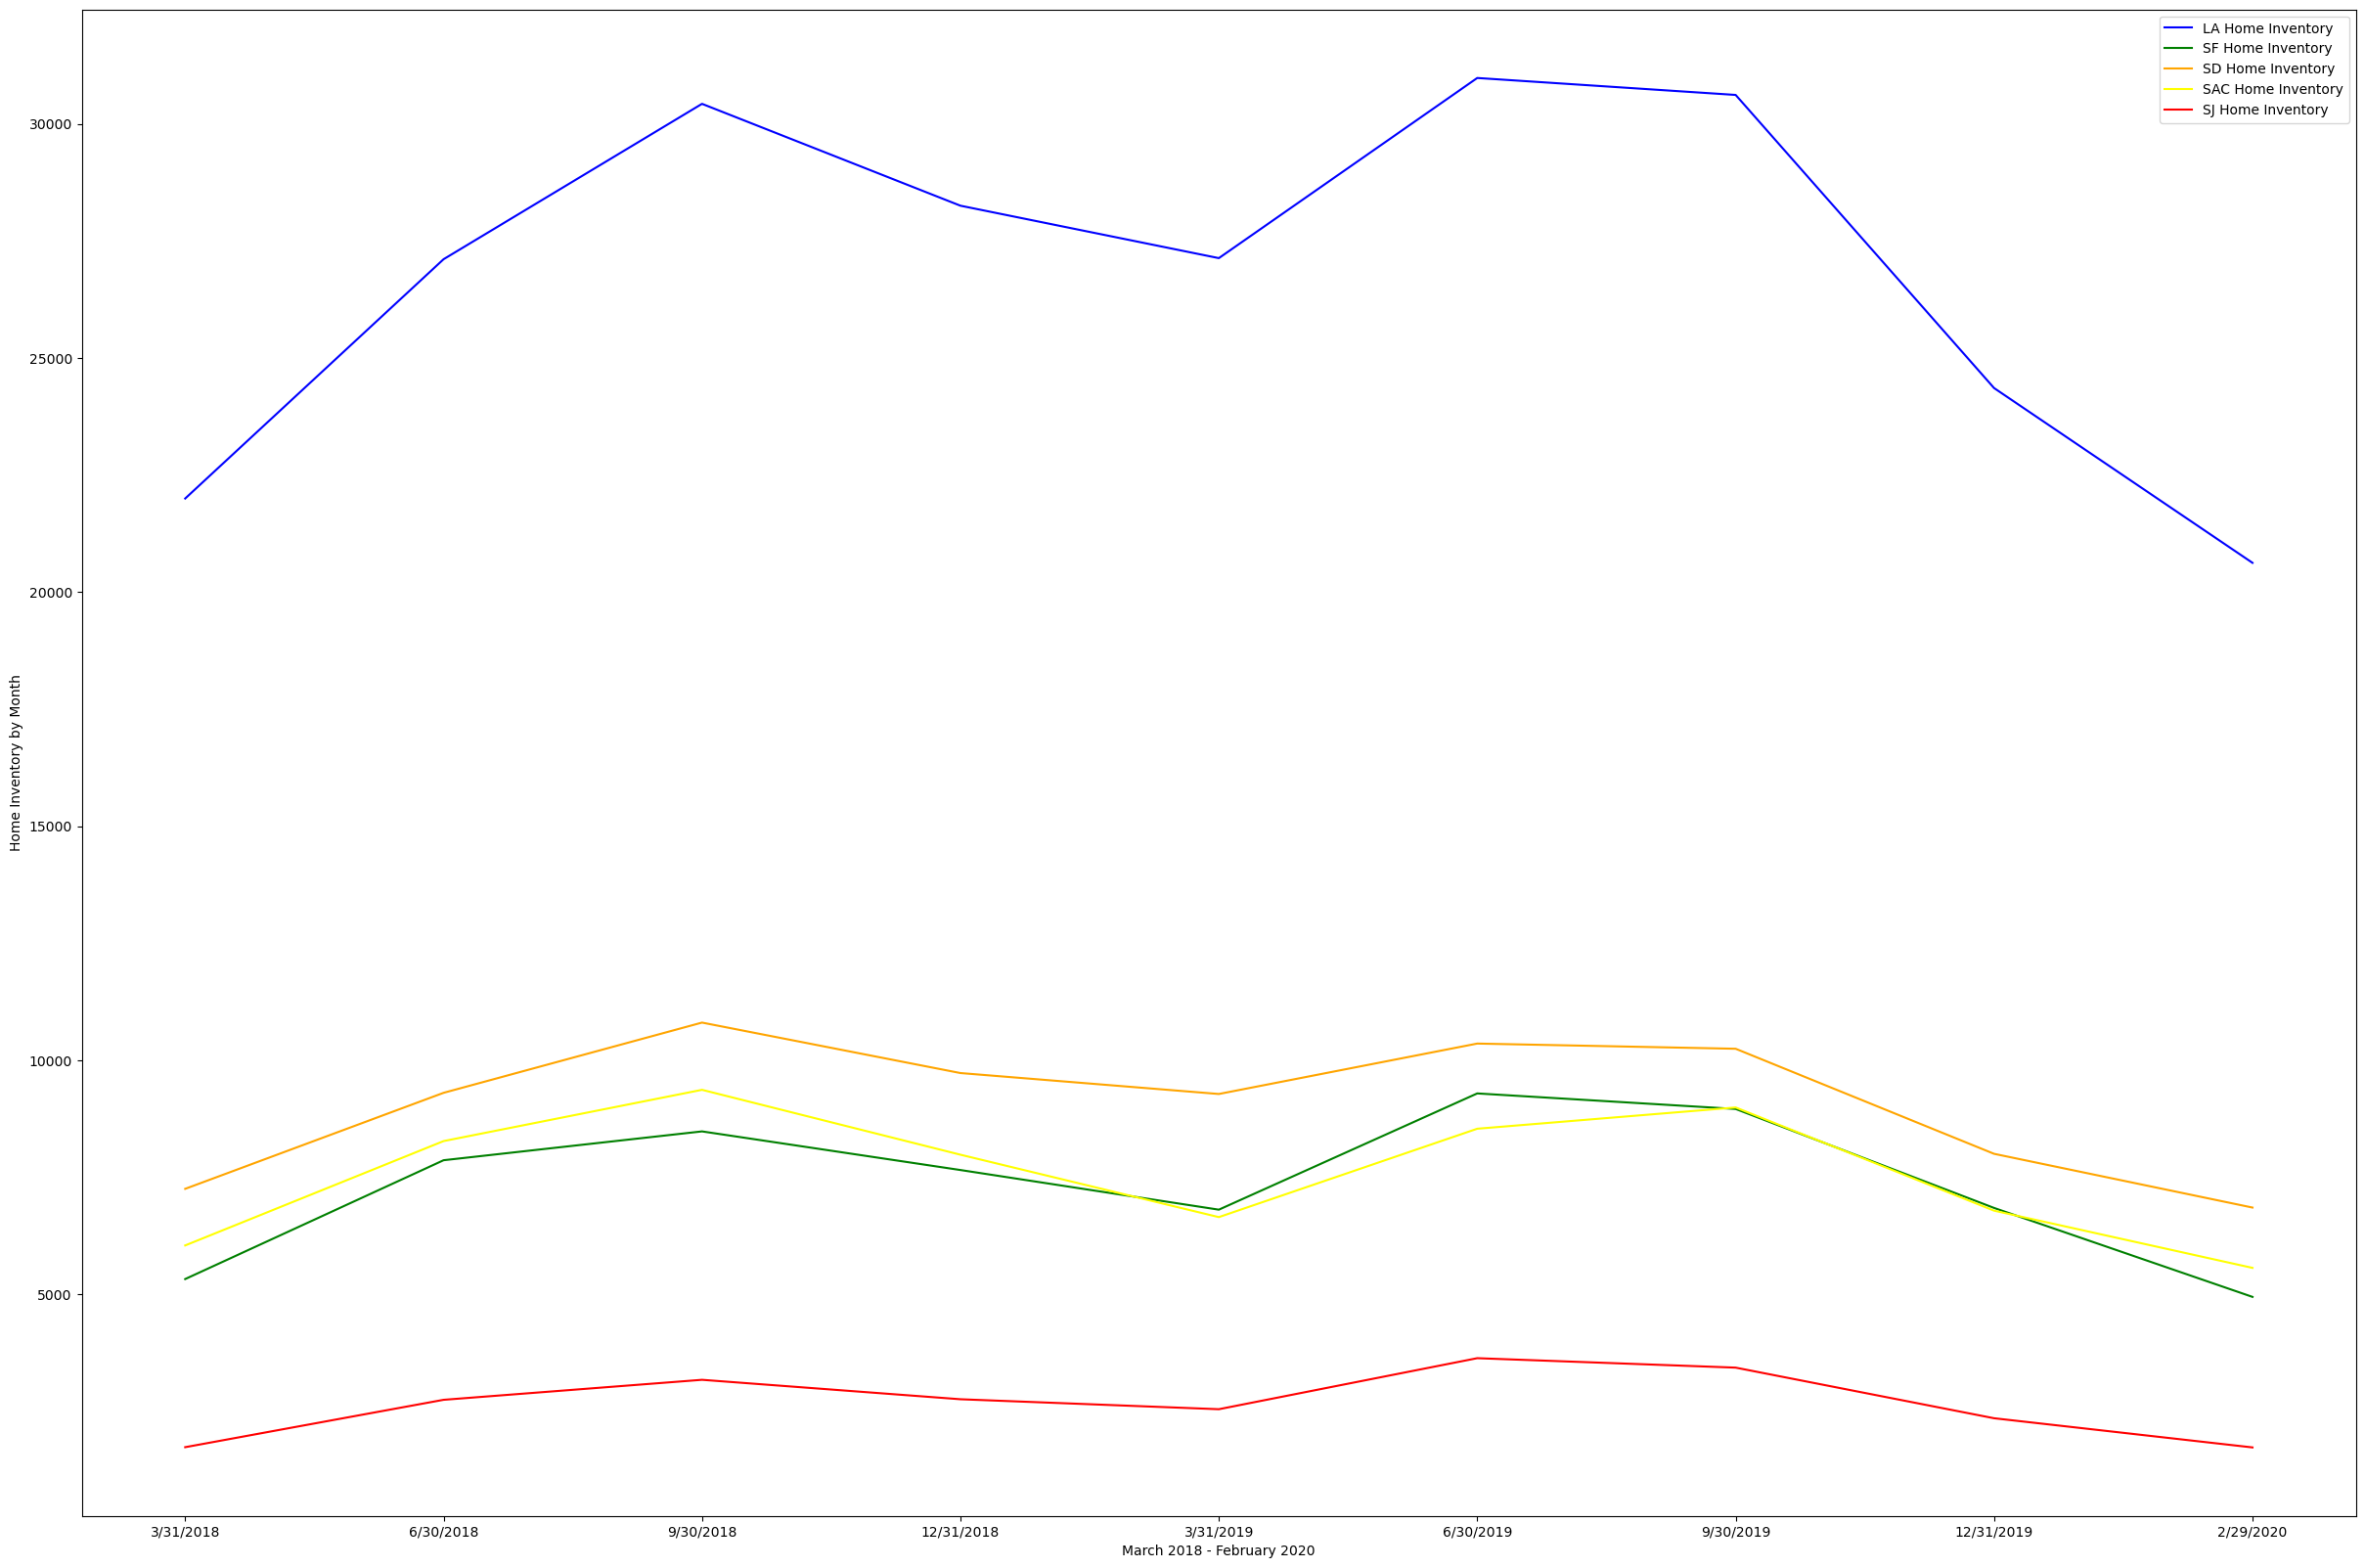

In [80]:
LA=pre_covid.loc[2]
SF=pre_covid.loc[12]
SD=pre_covid.loc[17]
SAC=pre_covid.loc[26]
SJ=pre_covid.loc[35]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(months, LA, color='blue', label="LA Home Inventory")
SF_avg=plt.plot(months, SF, color="green", label="SF Home Inventory")
SD_avg=plt.plot(months, SD, color='orange', label="SD Home Inventory")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Home Inventory")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Home Inventory")
plt.legend()
plt.xlabel("March 2018 - February 2020")
plt.ylabel("Home Inventory by Month")
plt.show()

In [7]:
post_covid_df=clean_ca_inventory[["RegionName","3/31/2020", "4/30/2020", "5/31/2020", "6/30/2020", "7/31/2020", "8/31/2020",
                                "9/30/2020", "10/31/2020", "11/30/2020", "12/31/2020", "1/31/2021", "2/28/2021","3/31/2021", 
                                 "4/30/2021", "5/31/2021", "6/30/2021", "7/31/2021", "8/31/2021",
                                "9/30/2021", "10/31/2021", "11/30/2021", "12/31/2021","1/31/2022", "2/28/2022",
                                 "3/31/2022", "4/30/2022", "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022",
                                "9/30/2022", "10/31/2022", "11/30/2022", "12/31/2022","1/31/2023", "2/28/2023",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_df

,RegionName,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",21194.0,20897.0,21255.0,22209.0,24174.0,25175.0,25453.0,25306.0,24128.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,"San Francisco, CA",5521.0,5780.0,6309.0,7091.0,8360.0,8994.0,9360.0,9704.0,9282.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,"San Diego, CA",7101.0,7382.0,7596.0,7720.0,7740.0,7731.0,7590.0,7460.0,6971.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,"Sacramento, CA",5846.0,6016.0,6391.0,6660.0,6863.0,6667.0,6331.0,6155.0,5682.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,"San Jose, CA",1949.0,2100.0,2326.0,2577.0,2901.0,3024.0,3097.0,3167.0,3010.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,"Fresno, CA",2001.0,1980.0,1964.0,1878.0,1812.0,1754.0,1722.0,1689.0,1591.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [81]:
post_covid=clean_ca_inventory[["3/31/2020", "6/30/2020",
                                "9/30/2020", "12/31/2020","3/31/2021", 
                                 "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022", "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]]

In [82]:
months=post_covid.keys()
months

Index(['3/31/2020', '6/30/2020', '9/30/2020', '12/31/2020', '3/31/2021',
       '6/30/2021', '9/30/2021', '12/31/2021', '3/31/2022', '6/30/2022',
       '9/30/2022', '12/31/2022', '3/31/2023', '4/30/2023'],
      dtype='object')

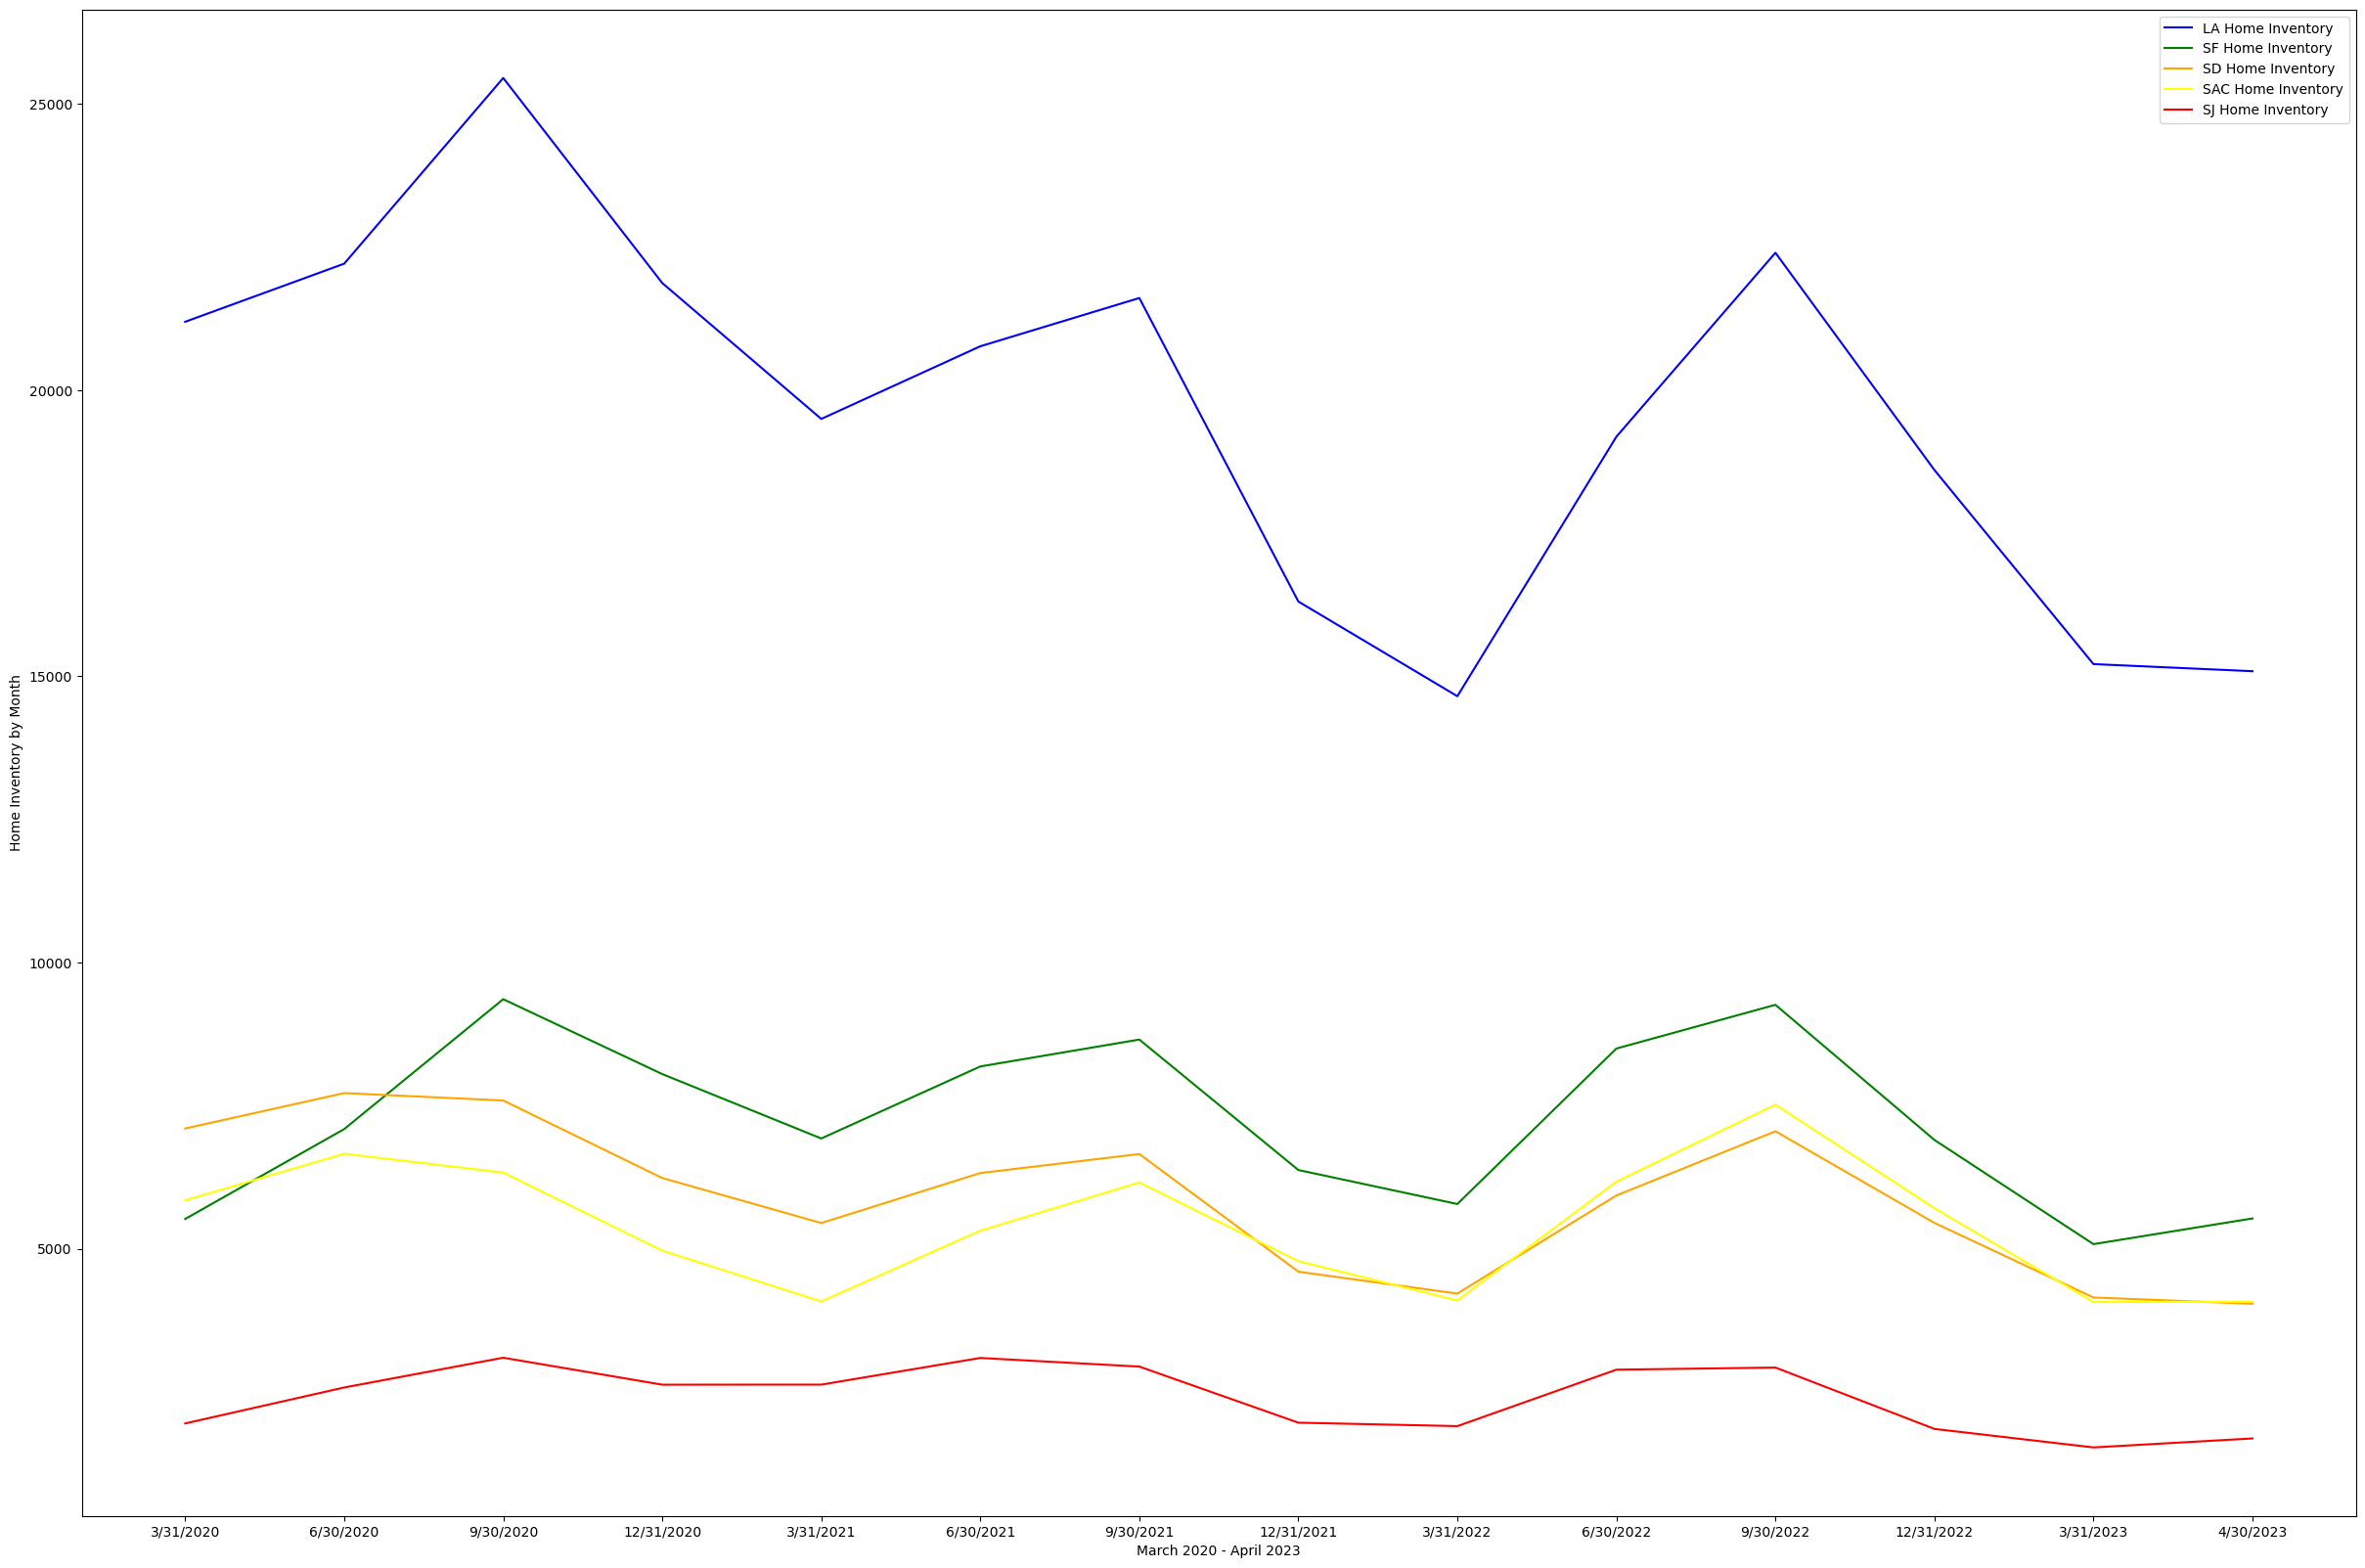

In [83]:
LA=post_covid.loc[2]
SF=post_covid.loc[12]
SD=post_covid.loc[17]
SAC=post_covid.loc[26]
SJ=post_covid.loc[35]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(months, LA, color='blue', label="LA Home Inventory")
SF_avg=plt.plot(months, SF, color="green", label="SF Home Inventory")
SD_avg=plt.plot(months, SD, color='orange', label="SD Home Inventory")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Home Inventory")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Home Inventory")
plt.legend()
plt.xlabel("March 2020 - April 2023")
plt.ylabel("Home Inventory by Month")
plt.show()

In [8]:
file2= Path("data/Rental data. monthly.csv")
rental_df=pd.read_csv(file2)

In [9]:
rental_df.head(13)

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,102001,0,United States,country,NaN,1316.882137,1327.077746,1336.985344,1347.189723,1353.394167,...,1987.491300,2002.482563,2008.140297,2006.081681,1997.638718,1992.421079,1991.266756,1997.228610,2006.354216,2018.055353
1,394913,1,"New York, NY",msa,NY,2443.764214,2464.719370,2483.196870,2500.971887,2512.718350,...,3207.491920,3233.573512,3231.414682,3207.885431,3175.252087,3151.638239,3143.696116,3159.468131,3188.554355,3229.346478
2,753899,2,"Los Angeles, CA",msa,CA,1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187
3,394463,3,"Chicago, IL",msa,IL,1490.453763,1502.135150,1513.653098,1523.141742,1529.525405,...,1926.675734,1935.965115,1939.042087,1936.999439,1930.524303,1931.114992,1934.797789,1949.648014,1963.410538,1981.453014
4,394514,4,"Dallas, TX",msa,TX,1156.562026,1167.566988,1178.805865,1187.481860,1193.257396,...,1822.737036,1834.605968,1833.954651,1821.664564,1806.901852,1791.518277,1785.807533,1788.122845,1795.573723,1801.517431
5,394692,5,"Houston, TX",msa,TX,1282.313698,1289.042858,1298.305096,1308.982960,1314.857222,...,1648.672235,1657.369679,1657.126429,1651.760260,1643.435294,1638.036526,1643.489094,1651.265892,1661.996669,1667.828831
6,395209,6,"Washington, DC",msa,VA,1787.410980,1796.223914,1804.057257,1813.993847,1817.625661,...,2248.883014,2265.011169,2269.005212,2259.192189,2240.103711,2222.593316,2218.412134,2228.155240,2248.283957,2264.324239
7,394974,7,"Philadelphia, PA",msa,PA,1346.057380,1352.515392,1363.050016,1368.619578,1372.200869,...,1843.357832,1855.017472,1857.240298,1852.603084,1846.379462,1842.389484,1841.644648,1842.761387,1846.734460,1854.661487
8,394856,8,"Miami, FL",msa,FL,1595.526631,1602.793270,1608.589962,1619.913636,1627.907683,...,2753.110401,2761.095775,2774.595709,2782.833773,2794.883568,2791.636530,2789.548688,2787.453926,2796.063759,2804.595689
9,394347,9,"Atlanta, GA",msa,GA,1097.719342,1106.876803,1116.288842,1126.557624,1136.237081,...,1958.983329,1977.497493,1985.456489,1979.623304,1969.217039,1962.958820,1957.956114,1963.287958,1967.835419,1979.630064


In [10]:
ca_rental=pd.DataFrame(rental_df.loc[[2,12,17,26,35,56]])

ca_rental

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187
12,395057,12,"San Francisco, CA",msa,CA,2378.542329,2404.115293,2436.319434,2472.506281,2504.773834,...,3137.819039,3150.576564,3147.162173,3134.211505,3112.309697,3098.350285,3089.845933,3097.124206,3111.439067,3121.825352
17,395056,17,"San Diego, CA",msa,CA,1784.219078,1794.202840,1799.577967,1809.206980,1820.488401,...,2988.681345,3025.094847,3033.909900,3028.264858,3000.917553,2981.183899,2966.022672,2975.253185,3000.873507,3039.548454
26,395045,26,"Sacramento, CA",msa,CA,1315.287612,1325.346620,1335.416623,1344.048533,1353.416736,...,2287.723162,2288.902132,2221.384225,2216.070830,2204.684147,2208.811974,2203.997743,2217.122467,2278.418341,2283.740342
35,395059,36,"San Jose, CA",msa,CA,2563.996918,2603.308738,2639.926279,2699.353871,2736.825818,...,3319.315130,3347.891315,3344.996611,3312.672031,3275.904726,3252.800868,3258.281763,3265.527581,3278.880383,3289.086180
56,394619,57,"Fresno, CA",msa,CA,1162.134892,1169.588323,1174.805072,1184.424537,1182.928115,...,1965.925568,1966.640352,1968.621585,1995.153910,2009.962446,2019.738456,2030.700913,2036.419670,2038.475631,2028.970648


In [11]:
clean_ca_rental=ca_rental.drop(columns=["RegionID", "SizeRank", "RegionType", "StateName"])
clean_ca_rental

,RegionName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,1992.539805,2003.693107,2007.515047,2011.865137,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187
12,"San Francisco, CA",2378.542329,2404.115293,2436.319434,2472.506281,2504.773834,2525.593710,2541.780360,2552.716126,2555.032392,...,3137.819039,3150.576564,3147.162173,3134.211505,3112.309697,3098.350285,3089.845933,3097.124206,3111.439067,3121.825352
17,"San Diego, CA",1784.219078,1794.202840,1799.577967,1809.206980,1820.488401,1833.037958,1842.721375,1845.169506,1848.627144,...,2988.681345,3025.094847,3033.909900,3028.264858,3000.917553,2981.183899,2966.022672,2975.253185,3000.873507,3039.548454
26,"Sacramento, CA",1315.287612,1325.346620,1335.416623,1344.048533,1353.416736,1366.351221,1382.607309,1386.633454,1388.375323,...,2287.723162,2288.902132,2221.384225,2216.070830,2204.684147,2208.811974,2203.997743,2217.122467,2278.418341,2283.740342
35,"San Jose, CA",2563.996918,2603.308738,2639.926279,2699.353871,2736.825818,2766.646867,2762.676251,2764.195556,2754.532617,...,3319.315130,3347.891315,3344.996611,3312.672031,3275.904726,3252.800868,3258.281763,3265.527581,3278.880383,3289.086180
56,"Fresno, CA",1162.134892,1169.588323,1174.805072,1184.424537,1182.928115,1177.778589,1174.747698,1181.885057,1191.248140,...,1965.925568,1966.640352,1968.621585,1995.153910,2009.962446,2019.738456,2030.700913,2036.419670,2038.475631,2028.970648


In [12]:
pre_covid_rental=clean_ca_rental[["RegionName","3/31/2018", "4/30/2018", "5/31/2018", "6/30/2018", "7/31/2018", "8/31/2018",
                                "9/30/2018", "10/31/2018", "11/30/2018", "12/31/2018", "1/31/2019", "2/28/2019","3/31/2019", 
                                 "4/30/2019", "5/31/2019", "6/30/2019", "7/31/2019", "8/31/2019",
                                "9/30/2019", "10/31/2019", "11/30/2019", "12/31/2019","1/31/2020", "2/29/2020" ]]
pre_covid_rental.head()

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020
2,"Los Angeles, CA",2265.071477,2276.676955,2288.427117,2301.231310,2312.264725,2323.716003,2329.296317,2334.353659,2337.549128,...,2380.474597,2392.559226,2401.944828,2411.817383,2416.708434,2418.543444,2417.619003,2422.459078,2429.216103,2436.961969
12,"San Francisco, CA",2767.353978,2781.349167,2800.843444,2819.242098,2836.120929,2848.262070,2850.498838,2850.957712,2848.915816,...,2897.615928,2916.209930,2932.738188,2940.624090,2937.329860,2926.584159,2920.810631,2917.894432,2931.222753,2942.477676
17,"San Diego, CA",2090.860344,2102.433897,2117.913519,2129.712935,2143.080904,2152.923843,2159.776617,2159.595748,2157.892771,...,2197.149834,2208.442849,2217.948512,2228.157839,2233.655913,2239.509124,2237.725713,2235.111403,2235.541581,2243.253166
26,"Sacramento, CA",1649.483432,1661.970396,1677.256837,1693.815112,1706.670904,1719.131902,1717.861411,1719.468423,1715.153647,...,1764.780631,1776.720946,1787.499698,1795.482017,1796.274252,1797.224298,1796.694544,1786.763346,1786.641003,1792.625845
35,"San Jose, CA",2909.379675,2932.553963,2957.897205,2981.054308,2998.112925,3007.236401,3006.852064,2997.131505,2982.476142,...,3029.590066,3046.530586,3064.392401,3078.020646,3073.149942,3058.634096,3043.084884,3041.268943,3053.406767,3068.614556


In [84]:
pre_covid_rentals=clean_ca_rental[["3/31/2018", "6/30/2018",
                                "9/30/2018", "12/31/2018","3/31/2019", 
                                  "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]]


In [85]:
months=pre_covid_rentals.keys()
months

Index(['3/31/2018', '6/30/2018', '9/30/2018', '12/31/2018', '3/31/2019',
       '6/30/2019', '9/30/2019', '12/31/2019', '2/29/2020'],
      dtype='object')

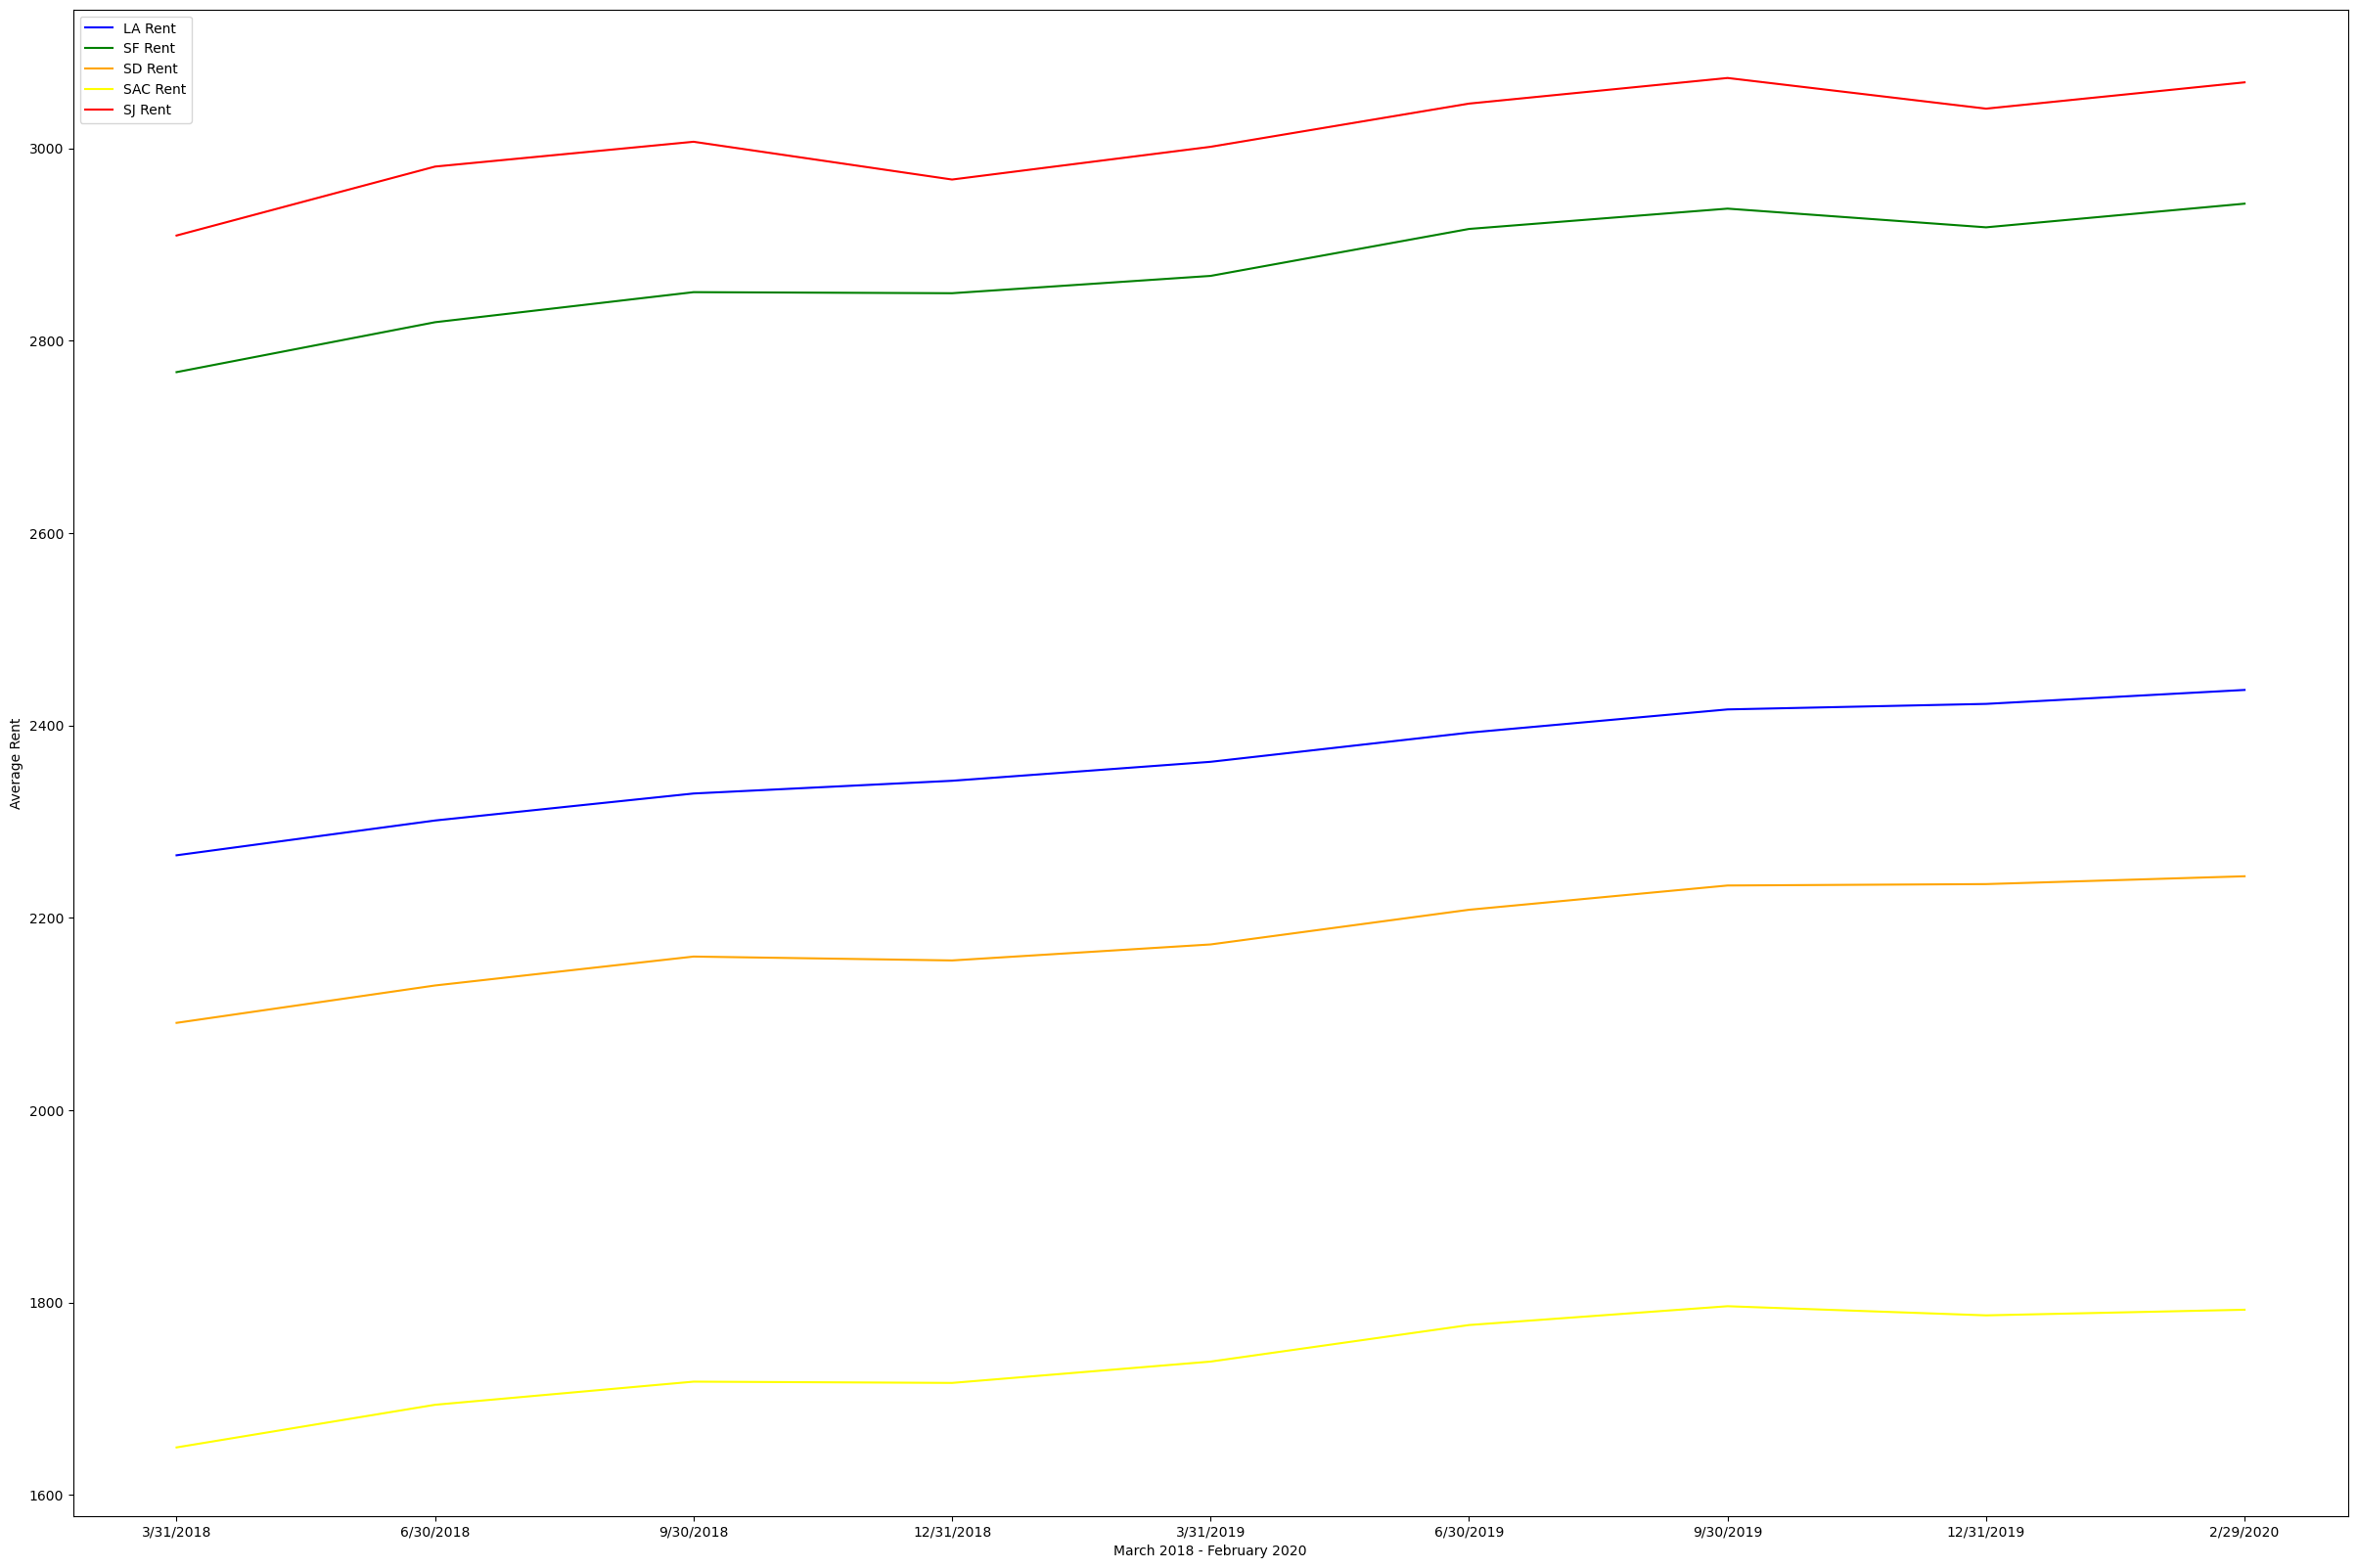

In [86]:
LA=pre_covid_rentals.loc[2]
SF=pre_covid_rentals.loc[12]
SD=pre_covid_rentals.loc[17]
SAC=pre_covid_rentals.loc[26]
SJ=pre_covid_rentals.loc[35]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(months, LA, color='blue', label="LA Rent")
SF_avg=plt.plot(months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Rent")
plt.legend()
plt.xlabel("March 2018 - February 2020")
plt.ylabel("Average Rent")
plt.show()

In [ ]:
LA=pre_covid_rentals.iloc[2]
SF=pre_covid_rentals.loc[12]
SD=pre_covid_rentals.loc[17]
SAC=pre_covid_rentals.loc[26]
SJ=pre_covid_rentals.loc[35]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(months, LA, color='blue', label="LA Rent")
SF_avg=plt.plot(months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Rent")
plt.legend()
plt.xlabel("March 2018 - February 2020")
plt.ylabel("Average Rent")
plt.show()

In [92]:
post_covid_rental=clean_ca_rental[["RegionName","3/31/2020", "4/30/2020", "5/31/2020", "6/30/2020", "7/31/2020", "8/31/2020",
                                "9/30/2020", "10/31/2020", "11/30/2020", "12/31/2020", "1/31/2021", "2/28/2021","3/31/2021", 
                                 "4/30/2021", "5/31/2021", "6/30/2021", "7/31/2021", "8/31/2021",
                                "9/30/2021", "10/31/2021", "11/30/2021", "12/31/2021","1/31/2022", "2/28/2022",
                                 "3/31/2022", "4/30/2022", "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022",
                                "9/30/2022", "10/31/2022", "11/30/2022", "12/31/2022","1/31/2023", "2/28/2023",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_rental.head()

,RegionName,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",2437.138360,NaN,NaN,2387.710691,2389.404037,2389.376732,2390.773149,2391.319141,2398.436690,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187
12,"San Francisco, CA",2949.651850,2939.372827,2927.211641,2908.052281,2887.142551,NaN,NaN,2732.149796,2711.397887,...,3137.819039,3150.576564,3147.162173,3134.211505,3112.309697,3098.350285,3089.845933,3097.124206,3111.439067,3121.825352
17,"San Diego, CA",2253.894424,2243.458898,2232.871179,2228.138757,2243.027683,2256.225440,2269.314231,2282.246451,2298.024656,...,2988.681345,3025.094847,3033.909900,3028.264858,3000.917553,2981.183899,2966.022672,2975.253185,3000.873507,3039.548454
26,"Sacramento, CA",1807.858790,1810.997201,1806.033609,1816.929249,1836.298945,1861.291482,1879.598530,1892.855683,1905.139071,...,2287.723162,2288.902132,2221.384225,2216.070830,2204.684147,2208.811974,2203.997743,2217.122467,2278.418341,2283.740342
35,"San Jose, CA",3085.726841,3073.376729,3047.887763,3011.303266,2982.948427,2944.551681,2904.420247,2857.430104,2826.134251,...,3319.315130,3347.891315,3344.996611,3312.672031,3275.904726,3252.800868,3258.281763,3265.527581,3278.880383,3289.086180


In [114]:
post_covid_rentals=clean_ca_rental[["3/31/2020", "6/30/2020",
                                "10/31/2020", "12/31/2020","3/31/2021", 
                                  "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022",  "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_rentals.head()

,3/31/2020,6/30/2020,10/31/2020,12/31/2020,3/31/2021,6/30/2021,9/30/2021,12/31/2021,3/31/2022,6/30/2022,9/30/2022,12/31/2022,3/31/2023,4/30/2023
2,2437.138360,2387.710691,2391.319141,2399.822633,2419.904232,2504.650324,2660.652851,2733.626302,2802.062323,2893.926879,2939.060199,2918.427897,2926.201136,2940.362187
12,2949.651850,2908.052281,2732.149796,2693.068370,2728.540978,2842.457127,2962.327288,2969.116855,3030.387152,3112.380214,3147.162173,3098.350285,3111.439067,3121.825352
17,2253.894424,2228.138757,2282.246451,2309.211432,2342.213898,2466.883429,2642.023429,2729.693319,2794.521421,2946.905717,3033.909900,2981.183899,3000.873507,3039.548454
26,1807.858790,1816.929249,1892.855683,1910.182477,1945.076134,2060.673908,2183.946151,2163.881914,2197.354867,2266.274411,2221.384225,2208.811974,2278.418341,2283.740342
35,3085.726841,3011.303266,2857.430104,2799.839684,2808.928973,2927.094312,3054.990504,3049.843668,3134.210093,3271.446120,3344.996611,3252.800868,3278.880383,3289.086180


In [102]:
months=post_covid_rentals.keys()
months

Index(['3/31/2020', '6/30/2020', '10/31/2020', '12/31/2020', '3/31/2021',
       '6/30/2021', '9/30/2021', '12/31/2021', '3/31/2022', '6/30/2022',
       '9/30/2022', '12/31/2022', '3/31/2023', '4/30/2023'],
      dtype='object')

In [ ]:
average_CA_rent= post_covid_rentals[["3/31/2020", "6/30/2020",
                                "10/31/2020", "12/31/2020","3/31/2021", 
                                  "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022",  "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]].mean()
average_CA_rent

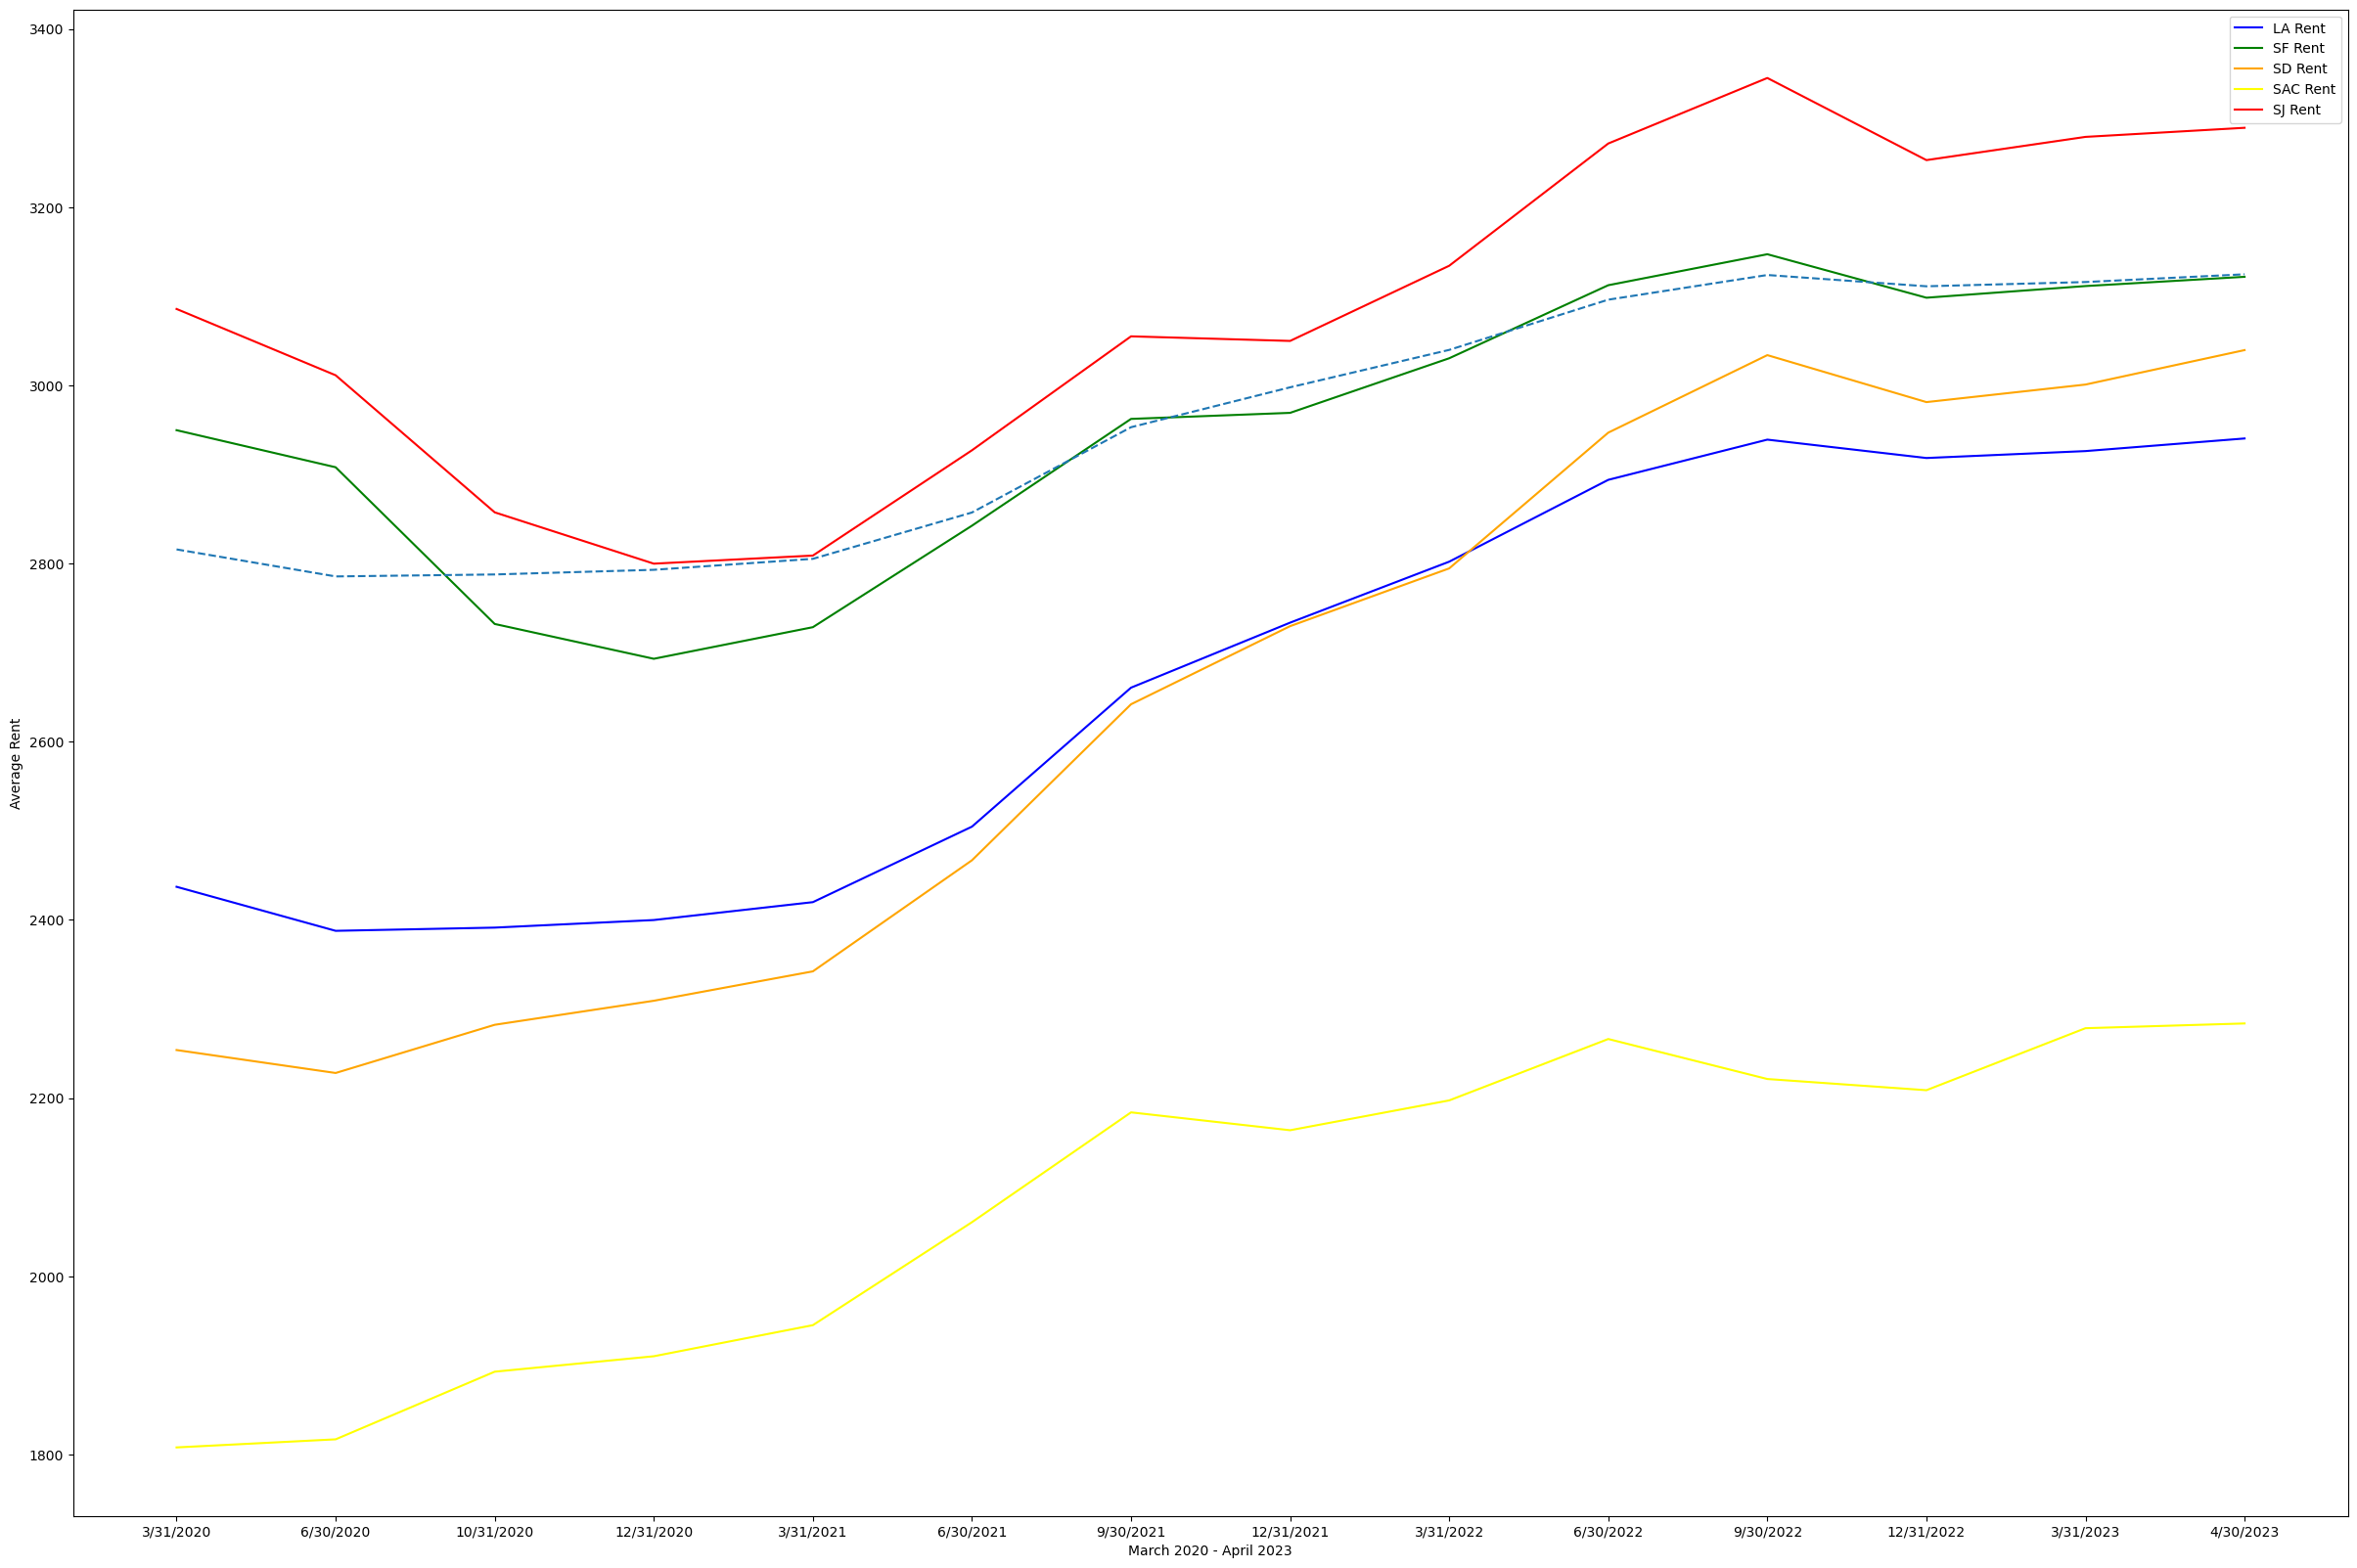

Regression Line Equation: y = 0.61x + 1320.27
Correlation Coefficient: 0.9129580294018116


In [147]:
LA=post_covid_rentals.iloc[0,0:]
SF=post_covid_rentals.iloc[1,0:]
SD=post_covid_rentals.iloc[2,0:]
SAC=post_covid_rentals.iloc[3,0:]
SJ=post_covid_rentals.iloc[4,0:]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(months, LA, color='blue', label="LA Rent")
SF_avg=plt.plot(months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Rent")
plt.legend()
plt.xlabel("March 2020 - April 2023")
plt.ylabel("Average Rent")

regression_months= post_covid_rentals.iloc[0,0:]

slope, intercept, r_value, p_value, std_err = linregress(regression_months, average_CA_rent)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate regression line
regression_line = slope * regression_months + intercept
plt.plot(regression_line, linestyle='--', label='Regression Line')

plt.show()
print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)

In [148]:
#average per month by city

#verage_CA_rent= post_covid_rentals[["3/31/2020", "6/30/2020",
                                "10/31/2020", "12/31/2020","3/31/2021", 
                                  "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022",  "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]].mean()
#verage_CA_rent

3/31/2020     2341.495489
6/30/2020     2308.405883
10/31/2020    2288.226765
12/31/2020    2285.790777
3/31/2021     2317.856162
6/30/2021     2432.345103
9/30/2021     2568.033724
12/31/2021    2589.485296
3/31/2022     2647.126264
6/30/2022     2743.648591
9/30/2022     2775.855782
12/31/2022    2746.552230
3/31/2023     2772.381344
4/30/2023     2783.922194
dtype: float64